In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

In [2]:
dataset = pd.read_csv("customer_churn_data.csv")
dataset.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [3]:
dataset.shape

(1000, 10)

In [4]:
dataset.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [5]:
dataset["InternetService"]

0      Fiber Optic
1      Fiber Optic
2      Fiber Optic
3              DSL
4              NaN
          ...     
995    Fiber Optic
996            NaN
997    Fiber Optic
998            NaN
999            NaN
Name: InternetService, Length: 1000, dtype: object

In [6]:
dataset["InternetService"] = dataset["InternetService"].fillna("")

In [7]:
dataset.isnull().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [8]:
dataset.duplicated().sum()

np.int64(0)

In [9]:
dataset.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [10]:
numeric_columns_data = dataset.select_dtypes(include=["number"])
numeric_columns_data

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
0,1,49,4,88.35,353.40
1,2,43,0,36.67,0.00
2,3,51,2,63.79,127.58
3,4,60,8,102.34,818.72
4,5,42,32,69.01,2208.32
...,...,...,...,...,...
995,996,42,41,37.14,1522.74
996,997,62,9,80.93,728.37
997,998,51,15,111.72,1675.80
998,999,39,68,65.67,4465.56


In [11]:
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [12]:
dataset

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes
...,...,...,...,...,...,...,...,...,...,...
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
996,997,62,Male,9,80.93,Month-to-Month,,728.37,No,Yes
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,,4465.56,No,Yes


In [13]:
import matplotlib.pyplot as plt 

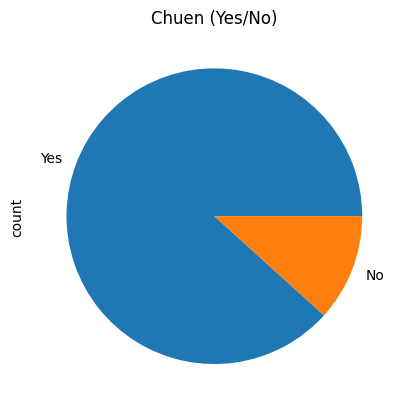

In [18]:
dataset["Churn"].value_counts().plot(kind="pie")
plt.title("Chuen (Yes/No)")
plt.show()

In [19]:
dataset.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [20]:
dataset.groupby(["Churn","Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [21]:
dataset.groupby("Churn")["Tenure"].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

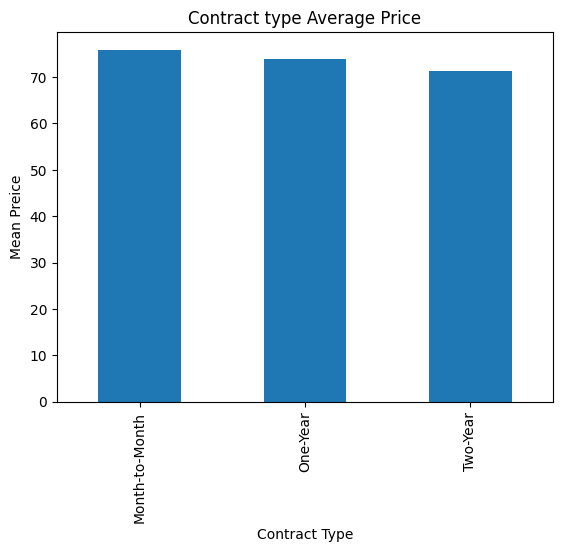

In [22]:
dataset.groupby("ContractType") ["MonthlyCharges"].mean().plot(kind="bar")
plt.ylabel("Mean Preice")
plt.xlabel("Contract Type")
plt.title("Contract type Average Price")
plt.show()

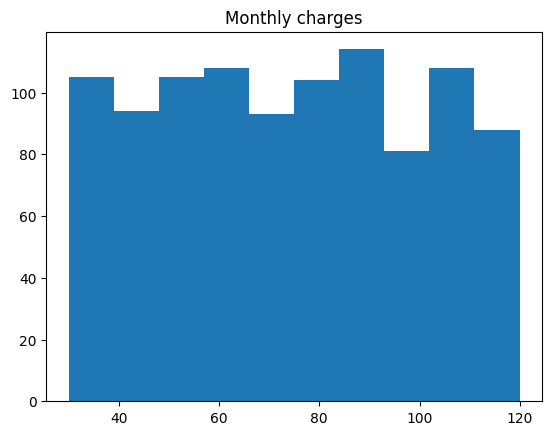

In [23]:
plt.hist(dataset["MonthlyCharges"])
plt.title("Monthly charges")
plt.show()


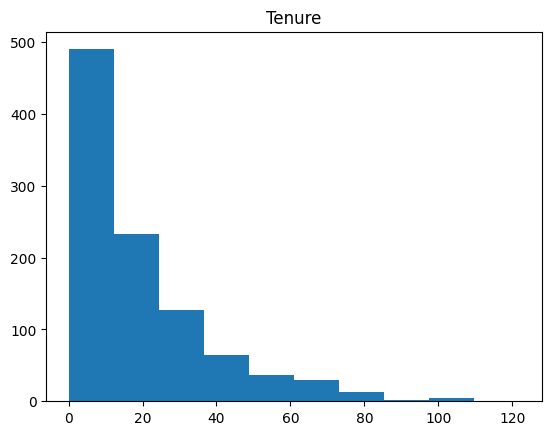

In [24]:
plt.hist(dataset["Tenure"])
plt.title("Tenure")
plt.show()

In [25]:
dataset.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [57]:
x = dataset[["Age","Gender", "Tenure", "MonthlyCharges"]]
y = dataset[["Churn"]]

In [143]:
x["Gender"] = x["Gender"].apply(lambda x: 1 if x =="Female" else 0) 

C:\Users\RAJAN KUMAR\AppData\Local\Temp\ipykernel_2440\2374799470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Gender"] = x["Gender"].apply(lambda x: 1 if x =="Female" else 0)


In [144]:
y["Churn"] = y["Churn"].apply(lambda x: 1 if x == "Yes" else 0)

C:\Users\RAJAN KUMAR\AppData\Local\Temp\ipykernel_2440\3691775968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Churn"] = y["Churn"].apply(lambda x: 1 if x == "Yes" else 0)


Train Train split

In [145]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [147]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [148]:
import joblib
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [150]:
x_test = scaler.fit_transform(x_test)


In [151]:
def modelperformance(predictions):
    print("Accueacy score on model is {}".format(accuracy_score(y_test, predictions)))

Training the model

In [152]:
model  = LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [156]:
y_pred = model.predict(x_test)

In [163]:
modelperformance(y_pred)

Accueacy score on model is 1.0


In [164]:
from sklearn.neighbors import KNeighborsClassifier

In [174]:
param_grid = {
    "weights": ["uniform","distance"]
}

In [175]:
gridkn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

In [177]:
import warnings
warnings.filterwarnings("ignore")


In [178]:
gridkn.fit(x_train, y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'weights': ['uniform', 'distance']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,5


In [179]:
gridkn.best_params_

{'weights': 'uniform'}

In [180]:
y_pred = gridkn.predict(x_test)

In [181]:
modelperformance(y_pred)

Accueacy score on model is 1.0


In [198]:
best_model = gridkn.best_estimator_

In [199]:
joblib.dump(best_model,"model.pkl")

['model.pkl']